<a href="https://colab.research.google.com/github/Gipsu99/PUM_PROJECT/blob/main/detekcja_he%C5%82m%C3%B3w_ochronnych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import bibliotek
W tym miejscu zostaną zaimportowane niezbędne biblioteki, które posłużą mi do analizy danych i wytrenowania modelu.


In [1]:
!pip install detecto #biblioteka potrzebna do wytreniowania modelu

import torch
import matplotlib.pyplot as plt
import numpy as np
import os

from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 2. Łączenie się z dyskiem Google'a

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/PUM')
# łączymy się z dyskiem google

Mounted at /content/drive


### 3. Przygotowanie danych


In [4]:
custom_transforms = transforms.Compose([
transforms.ToPILImage(), #konwertuje na obraz PIL
transforms.Resize(1200), #zmiana rozmiaru obrazu wejściowego do podanego rozmiaru
transforms.RandomHorizontalFlip(0.5), #odwracanie w poziomie danego obrazu losowo z określonym prawdopodobieństwem
transforms.ColorJitter(saturation=0.3), #losowa zmiana jasności, kontrastu itp.
transforms.ToTensor(), #konwertowanie na tensor
utils.normalize_transform(), #normalizacja obiektu z domyślną średnią i odchyleniem zgodnie z wymaganiami wytrenowanych modeli PyTorch
])
# w tym miejscu określamy parametry zdjęć, na których będziemy pracować

### 3.Trenowanie modelu
#### 🇬🇧 Model training

In [5]:
LABEL = ['helmet','head','person']
train_set = core.Dataset('/content/drive/My Drive/PUM/train', transform=custom_transforms)
loader= core.DataLoader(train_set, batch_size=2, shuffle=True)
test_set = core.Dataset('/content/drive/My Drive/PUM/test')


model = core.Model(LABEL) # określamy ile mamy nazw obiektów oraz wpisujemy ich nazwy
losses = model.fit(loader, test_set, epochs=5, lr_step_size=5, learning_rate=0.001, verbose=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 5
Begin iterating over training dataset


100%|██████████| 74/74 [00:48<00:00,  1.54it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:06<00:00,  7.69it/s]


Loss: 0.3960588115687464
Epoch 2 of 5
Begin iterating over training dataset


100%|██████████| 74/74 [00:50<00:00,  1.46it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:07<00:00,  6.57it/s]


Loss: 0.3308475276126581
Epoch 3 of 5
Begin iterating over training dataset


100%|██████████| 74/74 [00:50<00:00,  1.47it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:06<00:00,  7.43it/s]


Loss: 0.3318339153101631
Epoch 4 of 5
Begin iterating over training dataset


100%|██████████| 74/74 [00:49<00:00,  1.50it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:06<00:00,  7.69it/s]


Loss: 0.29718233491568
Epoch 5 of 5
Begin iterating over training dataset


100%|██████████| 74/74 [00:48<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:06<00:00,  7.48it/s]

Loss: 0.29213349046368225


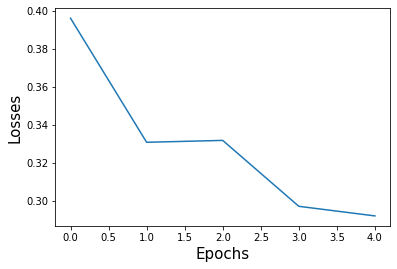

In [10]:
plt.xlabel("Epochs", fontsize = 15)
plt.ylabel("Losses", fontsize = 15)
plt.plot(losses)
plt.show()

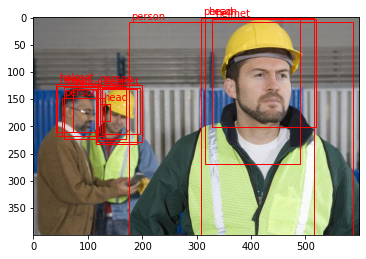

In [24]:
image = utils.read_image("/content/drive/My Drive/PUM/detect.jpg") 
predictions = model.predict(image) #przewidywanie etykiet wartości danych na podstawie wytrenowanego modelu
labels, boxes, scores = predictions
show_labeled_image(image, boxes, labels)

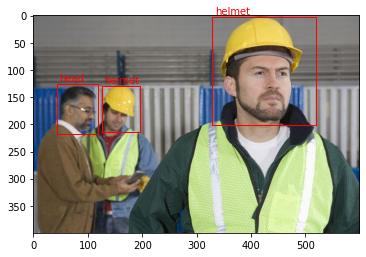

In [25]:
thresh=0.6
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)